## 목표
- 500명의 키와 몸무게, 비만도 라벨을 이용해서 비만을 판단하는 모델을 만들기

In [1]:
# 라이브러리 가져오기
# numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# bmi_500 import
bmi = pd.read_csv('bmi_500.csv', index_col='Label')
# 최상단 5개 데이터만 출력
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [7]:
# Label이 Normal인 데이터만 가져오기(loc, iloc 인덱서 활용)
bmi.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [8]:
# 전체 row수, 결측치 여부, 컬럼명 정보
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 31.8+ KB


In [9]:
# 기술통계 확인
# describe() method 사용
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


## 각 비만도 등급별로 시각화

In [26]:
# label 확인하기
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [29]:
# label별 색을 넣어주는 함수 정의
def myScatter(label, color) : 
    tmp = bmi.loc[label]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c = color,
               label = label)

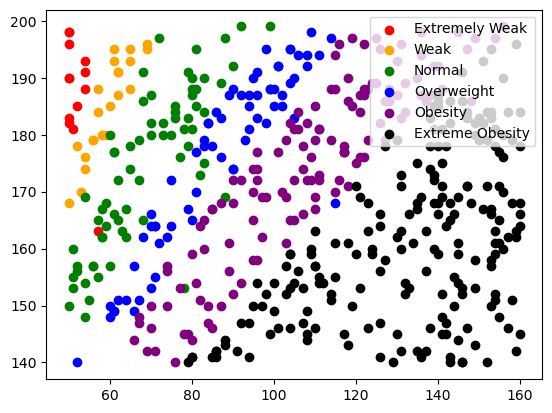

In [35]:
myScatter('Extremely Weak', 'red')
myScatter('Weak', 'orange')
myScatter('Normal', 'green')
myScatter('Overweight', 'blue')
myScatter('Obesity', 'purple')
myScatter('Extreme Obesity', 'black')

plt.legend(loc='upper right')

plt.show()

# 모델링
1. 문제와 답으로 분리
2. 훈련셋과 평가셋으로 분리
3. 모델생성 및 하이퍼파라미터 조정
4. 학습 및 평가

In [37]:
data = pd.read_csv('bmi_500.csv')
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [47]:
# 문제데이터, 답데이터로 분리
#input_data 라는 변수에는 문제 데이터로 담아주기 ('height : weight')
# target_data 라는 변소에는 답 데이터 담아주기('Label')
input_data = data.loc[:,'Height':'Weight']
print(input_data)
target_data = data.loc[:,'Label']
print(target_data)

     Height  Weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[500 rows x 2 columns]
0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object


In [48]:
# 문제와 답데이터의 모양/크기 확인하기
# shape method 활용

print(input_data.shape)
print(target_data.shape)


(500, 2)
(500,)


In [61]:
# 훈련세트와 테스트세트로 나누기
# 훈련세트 : 테스트세트 = 7 : 3
X_train = input_data.iloc[:350]
X_test = input_data.iloc[350:]
Y_train = target_data.iloc[:350]
Y_test = target_data.iloc[350:]

In [62]:
# 각각의 데이터의 크기/모양 확인
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [63]:
# 사이킷런 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈

In [66]:
# 모델 생성
# 하이퍼파라미터 튜닝
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model

KNeighborsClassifier(n_neighbors=10)

In [67]:
# 훈련 진행 fit method
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
# 예측 predict method
pre = knn_model.predict(X_test)
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [70]:
# 정확도 측정
metrics.accuracy_score(pre, Y_test)

0.94

## 활용하기

In [73]:
knn_model.predict([[179,73],[144,38]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal', 'Normal'], dtype=object)